In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE 
from sklearn.cluster import KMeans
from varclushi import VarClusHi
from sklearn.neighbors import LocalOutlierFactor
from PIL import Image

# Условие 1
В файле «baseball.csv» находится выборка с информацией по игрокам в бейсбол, включая
статистику их результативности, время участия в играх, лига, зарплата и т.д. Name (имя) нужно считать идентификатором записи. 

Загрузите этот файл и произведите следующие действия для кластерного анализа.

In [3]:
data_df = pd.read_csv('baseball.csv', index_col= 0)
data_df

,Team,nAtBat,nHits,nHome,nRuns,nRBI,nBB,YrMajor,CrAtBat,CrHits,...,CrBB,League,Division,Position,nOuts,nAssts,nError,Salary,Div,logSalary
Name,,,,,,,,,,,,,,,,,,,,,
"Allanson, Andy",Cleveland,293,66,1,30,29,14,1,293,66,...,14,American,East,C,446,33,20,NaN,AE,NaN
"Ashby, Alan",Houston,315,81,7,24,38,39,14,3449,835,...,375,National,West,C,632,43,10,475.0,NW,6.163315
"Davis, Alan",Seattle,479,130,18,66,72,76,3,1624,457,...,263,American,West,1B,880,82,14,480.0,AW,6.173786
"Dawson, Andre",Montreal,496,141,20,65,78,37,11,5628,1575,...,354,National,East,RF,200,11,3,500.0,NE,6.214608
"Galarraga, Andres",Montreal,321,87,10,39,42,30,2,396,101,...,33,National,East,1B,805,40,4,91.5,NE,4.516339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"McGee, Willie",St Louis,497,127,7,65,48,37,5,2703,806,...,138,National,East,CF,325,9,3,700.0,NE,6.551080
"Randolph, Willie",New York,492,136,5,76,50,94,12,5511,1511,...,875,American,East,2B,313,381,20,875.0,AE,6.774224
"Tolleson, Wayne",Chicago,475,126,3,61,43,52,6,1700,433,...,146,American,West,3B,37,113,7,385.0,AW,5.953243


# Условие 2
Обработка пропусков. Переменная Salary (и log Salary) может содержать пропуски,
произведите подстановку пропусков методом согласно вашему варианту. 

Пересчитайте logSalary как log(1+Salary), чтобы получить более симметричное распределение.

In [4]:
# найдем сколько у нас пропусков в данных
data_df.isna().sum()

Team          0
nAtBat        0
nHits         0
nHome         0
nRuns         0
nRBI          0
nBB           0
YrMajor       0
CrAtBat       0
CrHits        0
CrHome        0
CrRuns        0
CrRbi         0
CrBB          0
League        0
Division      0
Position      0
nOuts         0
nAssts        0
nError        0
Salary       59
Div           0
logSalary    59
dtype: int64

Для интереса посмотрим информацию о данных

In [5]:
data_df[['Salary', 'logSalary']].describe()

,Salary,logSalary
count,263.000000,263.000000
mean,535.925882,5.927222
std,451.118681,0.889192
min,67.500000,4.212128
25%,190.000000,5.247024
50%,425.000000,6.052089
75%,750.000000,6.620073
max,2460.000000,7.807917


Вывод: видим, что в наших данных только в 2-х столбцах есть пропуски.

## Обработаем их методом SimpleImputer(mean):

- Источник, который описывает процесс EDA: https://habr.com/ru/companies/otus/articles/681410/
- Документация к методу: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [6]:
imputer = SimpleImputer(strategy='mean') # просто заполняет пропуски средним значением
data_df[['Salary', 'logSalary']] = imputer.fit_transform(X= data_df[['Salary', 'logSalary']])
data_df.isna().sum()

Team         0
nAtBat       0
nHits        0
nHome        0
nRuns        0
nRBI         0
nBB          0
YrMajor      0
CrAtBat      0
CrHits       0
CrHome       0
CrRuns       0
CrRbi        0
CrBB         0
League       0
Division     0
Position     0
nOuts        0
nAssts       0
nError       0
Salary       0
Div          0
logSalary    0
dtype: int64

In [7]:
# снова посмотрим для интереса
data_df[['Salary', 'logSalary']].describe()
# count - увел
# квантили увеличились

,Salary,logSalary
count,322.000000,322.000000
mean,535.925882,5.927222
std,407.557548,0.803330
min,67.500000,4.212128
25%,226.250000,5.421595
50%,535.925882,5.927222
75%,700.000000,6.551080
max,2460.000000,7.807917


In [8]:
# в условии сказано пересчитать logSalary как log(1+Salary)
data_df['logSalary'] = np.log(data_df['Salary'] + 1)
data_df2 = data_df.copy() # нужно для 9 го задания 
data_df['logSalary'].describe()

count    322.000000
mean       5.996138
std        0.812050
min        4.226834
25%        5.426006
50%        6.285860
75%        6.552508
max        7.808323
Name: logSalary, dtype: float64

# Условие 3

Нормализация переменных – приведите числовые переменные к близким шкалам с помощью
методов для вашего варианта и закодируйте категориальные с помощью OneHotEncoder.

Метод: RobustScaler (<u>он устойчев к выбросам</u>)

{x - median} / {Q3 - Q1}

- Источник: https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/

## Находим данные, которые не типа object

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, Allanson, Andy to Wilson, Willie
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Team       322 non-null    object 
 1   nAtBat     322 non-null    int64  
 2   nHits      322 non-null    int64  
 3   nHome      322 non-null    int64  
 4   nRuns      322 non-null    int64  
 5   nRBI       322 non-null    int64  
 6   nBB        322 non-null    int64  
 7   YrMajor    322 non-null    int64  
 8   CrAtBat    322 non-null    int64  
 9   CrHits     322 non-null    int64  
 10  CrHome     322 non-null    int64  
 11  CrRuns     322 non-null    int64  
 12  CrRbi      322 non-null    int64  
 13  CrBB       322 non-null    int64  
 14  League     322 non-null    object 
 15  Division   322 non-null    object 
 16  Position   322 non-null    object 
 17  nOuts      322 non-null    int64  
 18  nAssts     322 non-null    int64  
 19  nError     322 non-null    int6

In [10]:
mask = pd.DataFrame(data_df.dtypes == np.object_) # выводим только те столбцы у которых тип object
mask = mask[mask[0] == True].index # здесь на самом деле не маска а реальное название столбцов
data_df[mask]

,Team,League,Division,Position,Div
Name,,,,,
"Allanson, Andy",Cleveland,American,East,C,AE
"Ashby, Alan",Houston,National,West,C,NW
"Davis, Alan",Seattle,American,West,1B,AW
"Dawson, Andre",Montreal,National,East,RF,NE
"Galarraga, Andres",Montreal,National,East,1B,NE
...,...,...,...,...,...
"McGee, Willie",St Louis,National,East,CF,NE
"Randolph, Willie",New York,American,East,2B,AE
"Tolleson, Wayne",Chicago,American,West,3B,AW


In [11]:
# создаем список колонок, который не типа object
columns_is_not_object = data_df.T[~data_df.columns.isin(mask)].T.columns # короче здесь происходит сначала выбор столбцов, но у нас к столбцам применяется маска а не к строкам, поэтому мы сначала транспонируем,  чтобы колонки стали строками, потом к ним уже применяем маску и с помощью транспонирования возвращаем все в исходное положение
columns_is_not_object

Index(['nAtBat', 'nHits', 'nHome', 'nRuns', 'nRBI', 'nBB', 'YrMajor',
       'CrAtBat', 'CrHits', 'CrHome', 'CrRuns', 'CrRbi', 'CrBB', 'nOuts',
       'nAssts', 'nError', 'Salary', 'logSalary'],
      dtype='object')

## Применение RobustScaler

In [12]:
scaler = RobustScaler()
data_df[columns_is_not_object] = scaler.fit_transform(data_df[columns_is_not_object]) 
data_df

,Team,nAtBat,nHits,nHome,nRuns,nRBI,nBB,YrMajor,CrAtBat,CrHits,...,CrBB,League,Division,Position,nOuts,nAssts,nError,Salary,Div,logSalary
Name,,,,,,,,,,,,,,,,,,,,,
"Allanson, Andy",Cleveland,-0.404984,-0.465950,-0.625000,-0.473684,-0.444444,-0.671875,-0.714286,-0.561248,-0.559585,...,-0.558100,American,East,C,1.084589,-0.040881,1.750,0.000000,AE,0.000000
"Ashby, Alan",Houston,-0.313603,-0.250896,-0.125000,-0.631579,-0.194444,0.109375,1.142857,0.438356,0.325849,...,0.666667,National,West,C,1.946698,0.022013,0.500,-0.128603,NW,-0.106917
"Davis, Alan",Seattle,0.367601,0.451613,0.791667,0.473684,0.750000,1.265625,-0.428571,-0.139679,-0.109384,...,0.286684,American,West,1B,3.096176,0.267296,1.000,-0.118049,AW,-0.097641
"Dawson, Andre",Montreal,0.438214,0.609319,0.958333,0.447368,0.916667,0.046875,0.714286,1.128514,1.177893,...,0.595420,National,East,RF,-0.055620,-0.179245,-0.375,-0.075833,NE,-0.061477
"Galarraga, Andres",Montreal,-0.288681,-0.164875,0.125000,-0.236842,-0.083333,-0.171875,-0.571429,-0.528625,-0.519286,...,-0.493639,National,East,1B,2.748552,0.003145,-0.250,-0.938102,NE,-1.561161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"McGee, Willie",St Louis,0.442368,0.408602,-0.125000,0.447368,0.083333,0.046875,-0.142857,0.202075,0.292458,...,-0.137405,National,East,CF,0.523754,-0.191824,-0.375,0.346331,NE,0.236704
"Randolph, Willie",New York,0.421599,0.537634,-0.291667,0.736842,0.138889,1.828125,0.857143,1.091456,1.104203,...,2.363020,American,East,2B,0.468134,2.147799,1.750,0.715724,AE,0.434536
"Tolleson, Wayne",Chicago,0.350987,0.394265,-0.458333,0.342105,-0.055556,0.515625,0.000000,-0.115607,-0.137018,...,-0.110263,American,West,3B,-0.811124,0.462264,0.125,-0.318577,AW,-0.292962


## Приводим категориальные данные в OneHotEncoding

Выясним какие данные категориальны

In [13]:
# снова используем тот же код
mask = pd.DataFrame(data_df.dtypes == np.object_) # выводим только те столбцы у которых тип object
mask = mask[mask[0] == True].index # здесь на самом деле не маска а реальное название столбцов
print(f"Team column содержит {len(data_df[mask]['Team'].unique())} уникальных значений")
print(f"League column содержит {len(data_df[mask]['League'].unique())} уникальных значений")
print(f"Division column содержит {len(data_df[mask]['Division'].unique())} уникальных значений")
print(f"Position column содержит {len(data_df[mask]['Position'].unique())} уникальных значений")
print(f"Div column содержит {len(data_df[mask]['Div'].unique())} уникальных значений")
data_df[mask]

Team column содержит 24 уникальных значений
League column содержит 2 уникальных значений
Division column содержит 2 уникальных значений
Position column содержит 25 уникальных значений
Div column содержит 4 уникальных значений


,Team,League,Division,Position,Div
Name,,,,,
"Allanson, Andy",Cleveland,American,East,C,AE
"Ashby, Alan",Houston,National,West,C,NW
"Davis, Alan",Seattle,American,West,1B,AW
"Dawson, Andre",Montreal,National,East,RF,NE
"Galarraga, Andres",Montreal,National,East,1B,NE
...,...,...,...,...,...
"McGee, Willie",St Louis,National,East,CF,NE
"Randolph, Willie",New York,American,East,2B,AE
"Tolleson, Wayne",Chicago,American,West,3B,AW


Вывод: 
- Div/Division/League/Team - дивизионы и лиги и т.д - это категриальный тип
- Но Position - это уже ранжировка, поэтому этот слобец тоже уберем

In [14]:
mask = mask.drop('Position')
mask

Index(['Team', 'League', 'Division', 'Div'], dtype='object')

In [15]:
# переводим эти столбцы в one_hot_encoding
data_df = pd.concat([data_df.drop(columns= mask), pd.get_dummies(data_df[mask])], axis= 1) # снова выбор только нужных столбцов
data_df 

,nAtBat,nHits,nHome,nRuns,nRBI,nBB,YrMajor,CrAtBat,CrHits,CrHome,...,Team_Texas,Team_Toronto,League_American,League_National,Division_East,Division_West,Div_AE,Div_AW,Div_NE,Div_NW
Name,,,,,,,,,,,,,,,,,,,,,
"Allanson, Andy",-0.404984,-0.465950,-0.625000,-0.473684,-0.444444,-0.671875,-0.714286,-0.561248,-0.559585,-0.490566,...,False,False,True,False,True,False,True,False,False,False
"Ashby, Alan",-0.313603,-0.250896,-0.125000,-0.631579,-0.194444,0.109375,1.142857,0.438356,0.325849,0.364780,...,False,False,False,True,False,True,False,False,False,True
"Davis, Alan",0.367601,0.451613,0.791667,0.473684,0.750000,1.265625,-0.428571,-0.139679,-0.109384,0.289308,...,False,False,True,False,False,True,False,True,False,False
"Dawson, Andre",0.438214,0.609319,0.958333,0.447368,0.916667,0.046875,0.714286,1.128514,1.177893,2.327044,...,False,False,False,True,True,False,False,False,True,False
"Galarraga, Andres",-0.288681,-0.164875,0.125000,-0.236842,-0.083333,-0.171875,-0.571429,-0.528625,-0.519286,-0.352201,...,False,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"McGee, Willie",0.442368,0.408602,-0.125000,0.447368,0.083333,0.046875,-0.142857,0.202075,0.292458,-0.100629,...,False,False,False,True,True,False,False,False,True,False
"Randolph, Willie",0.421599,0.537634,-0.291667,0.736842,0.138889,1.828125,0.857143,1.091456,1.104203,-0.012579,...,False,False,True,False,True,False,True,False,False,False
"Tolleson, Wayne",0.350987,0.394265,-0.458333,0.342105,-0.055556,0.515625,0.000000,-0.115607,-0.137018,-0.415094,...,False,False,True,False,False,True,False,True,False,False


## условие 4
С помощью восходящей иерархической кластеризации с выбранными параметрами
расстояния согласно вашему варианту постройте кластерную модель данных и дендрограмму
для топ 20 кластеров.

- link=complete, бурется самые дальние два объекта из класстера  
- dist=euclidean, расстояние евклидовое

# <b>Агломеративная иерархическая класстеризация</b>

<u>Алгоритм</u>
- Все класстеры изначально состоят из одно элемента
1) Цикл пока не найдутся все класстеры:
- Находим класстеры у которых расстояние маленькое
- Соединяем эти класстеры воедино
- И считаем расстояние Ланса

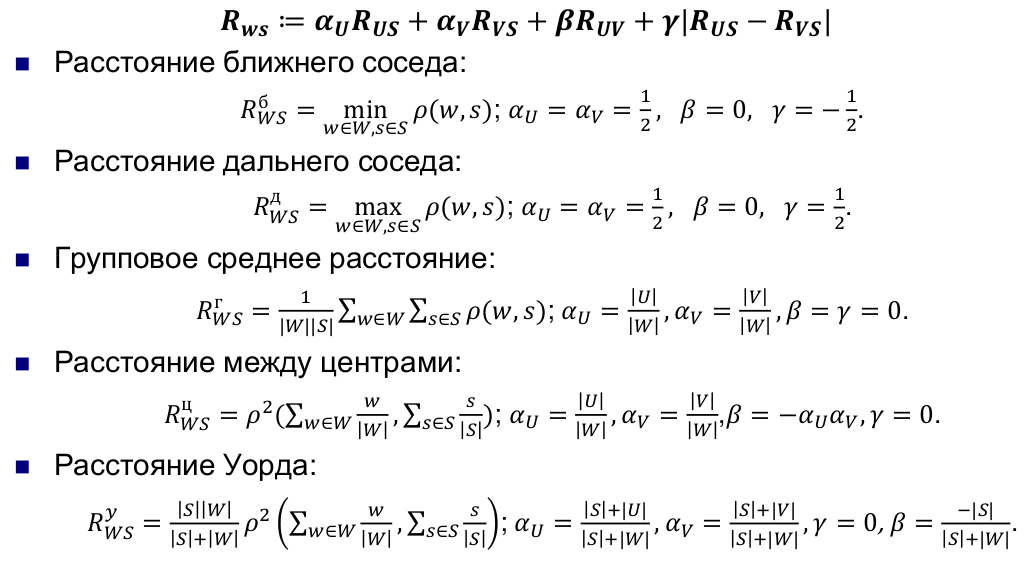

In [16]:
temp_df = data_df.drop(columns= ['Position'])

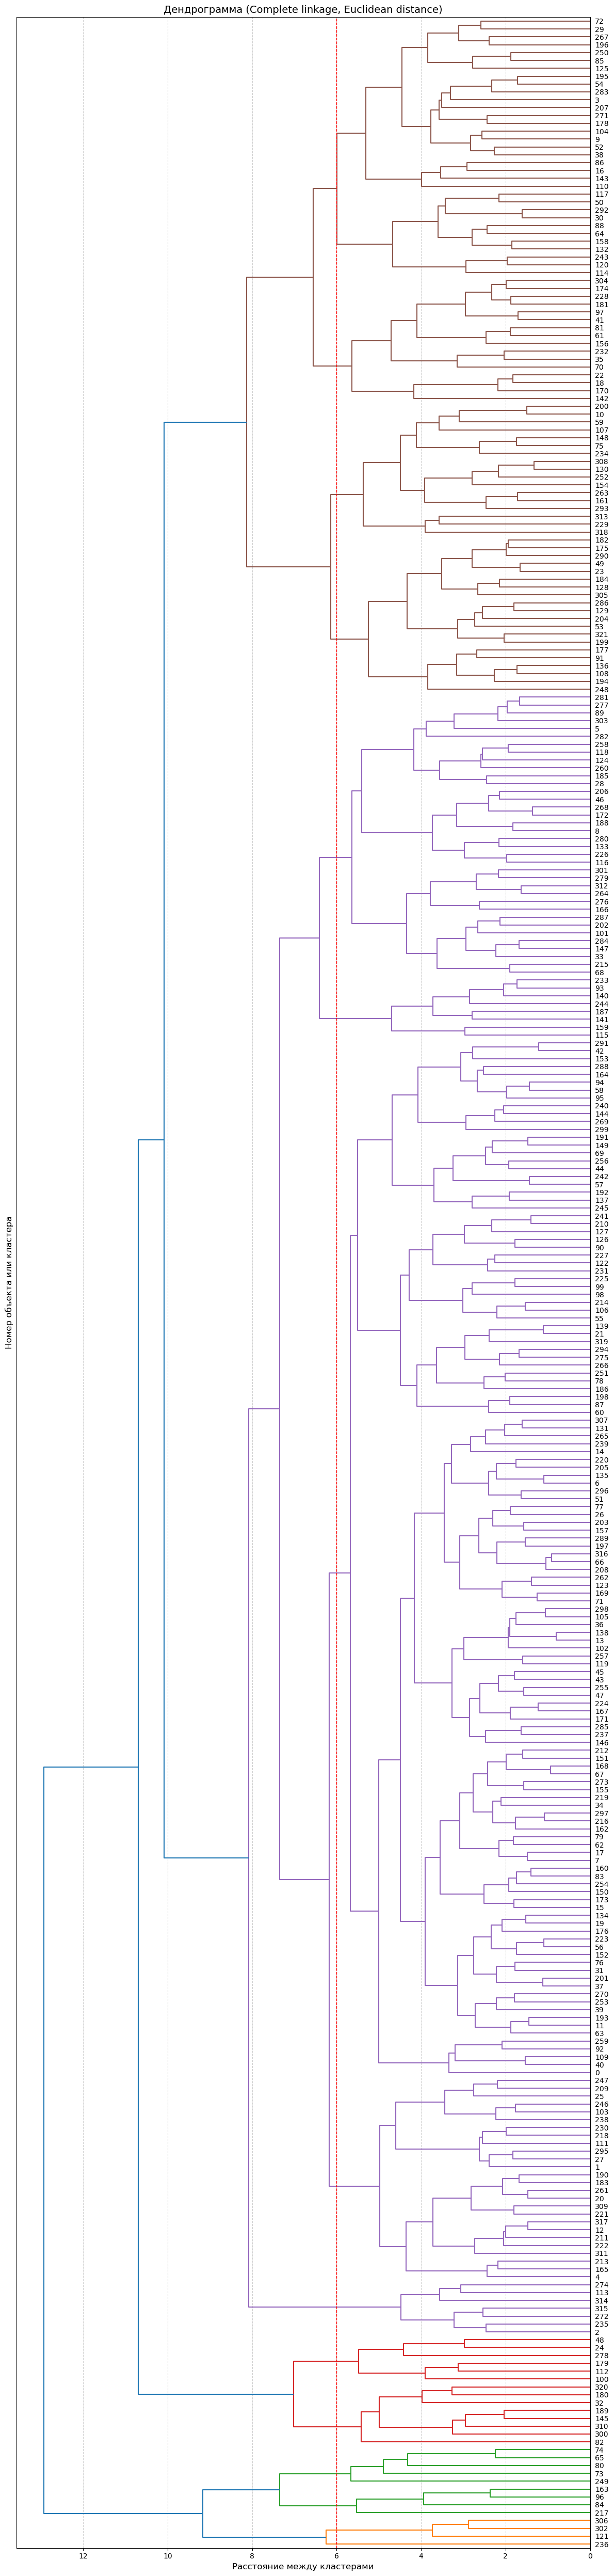

AgglomerativeClustering(linkage='complete', n_clusters=20)

In [17]:
# Построение linkage матрицы
Z = linkage(temp_df, method='complete', metric='euclidean')

# Настройка графика
plt.figure(figsize=(12, 50))  # Увеличенный размер (ширина x высота)

# Дендрограмма с поворотом осей
dendrogram(
    Z,
    orientation='left',       # Меняем оси местами (вертикальная дендрограмма)
    p=20,                    # степень в расстоянии Минковского
    show_leaf_counts=True,
    leaf_rotation=0,         # Подписи горизонтальны
    leaf_font_size=10,       # Увеличенный шрифт
)

plt.axvline(x=6, color='red', linestyle='--', linewidth=1)

# Настройка оформления
plt.title('Дендрограмма (Complete linkage, Euclidean distance)', fontsize=14)
plt.xlabel('Расстояние между кластерами', fontsize=12)
plt.ylabel('Номер объекта или кластера', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Сетка для расстояний
plt.tight_layout()  # Автоматическая подгонка layout
plt.show()

agg_cl_model = AgglomerativeClustering(
    n_clusters= 20,
    linkage='complete',
    metric='euclidean',
)
agg_cl_model.fit(temp_df)


## Условие 5

Рассчитайте значение критерия pseudoF для вариантов кластеризации 2-20 кластеров,
постройте график зависимости критерия от числа кластеров и выберите оптимальное (первый
локальный пик критерия при обходе от малого числа кластеров к большому). Отметьте точку
на графике. Сколько кластеров получилось?

Критерий pseudo-F применяют для оценки качества класстеризации:

<u>Формула:</u>

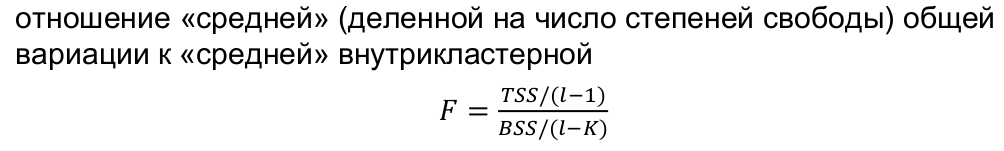

- отношение средней общей вариации к средней внутрикласстероной вариации  

- TSS - смященная дисперсия/ дисперсия выборки
- BSS - сумма смященных дисперсий всех кластеров
- (l - 1) - нормировка на число класстеров (позволяет правильно сравнивать большое число класстеров с маленьким)
- (l - K) - нормировка на число оставшихся степеней свободы (тоже самое, что и (l - 1), но только с учетом, что у нас K клсстеров) 

<u>Высокое значение pseudo-F:</u> кластеры плотные и хорошо разделены.

<u>Низкое значение:</u> кластеры пересекаются или размыты.

Оптимальное число кластеров: выбирается по первому локальному максимуму на графике pseudo-F от K

<u>Источник:</u>
https://stats.stackexchange.com/questions/79097/validity-index-pseudo-f-for-k-means-clustering

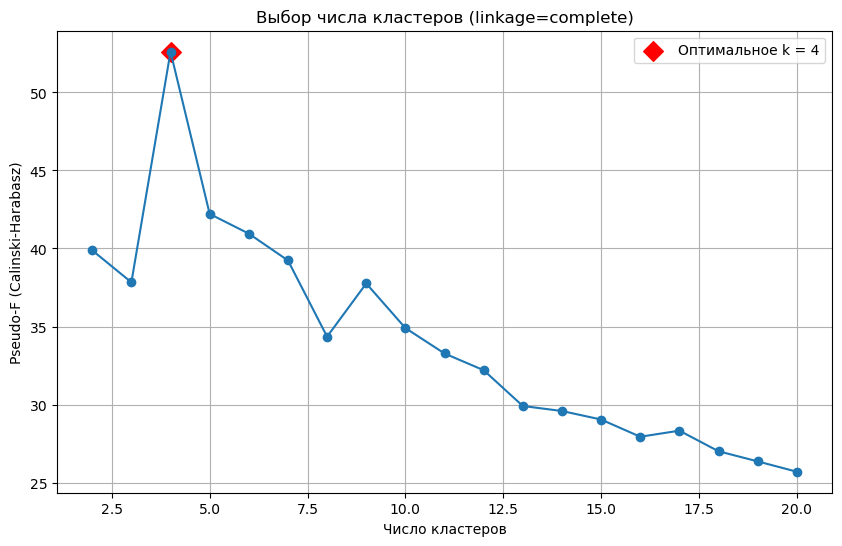

Оптимальное число кластеров: 4


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

def sum_dist_to_center(X):
    """Сумма квадратов расстояний от точек до центроида."""
    center = np.mean(X, axis=0)
    return np.sum((X - center) ** 2)

def choose_num_clusters(X, max_clust=20, linkage_method='complete', metric_method='euclidean'):
    """
    Выбор оптимального числа кластеров на основе критерия pseudo-F.
    Параметры:
        X: данные (n_samples, n_features)
        max_clust: максимальное число кластеров для проверки
        linkage_method: метод связи
        metric_method: метод для расчета расстояния
    """
    X_array = X.values if hasattr(X, 'values') else X  # Конвертируем DataFrame в массив
    N = X_array.shape[0]
    TSS = sum_dist_to_center(X_array)  # Общая сумма квадратов
    
    pseudo_f = []
    for K in range(2, max_clust + 1):
        # Иерархическая кластеризация
        model = AgglomerativeClustering(
            n_clusters=K,
            linkage=linkage_method,
            metric=metric_method
        )
        labels = model.fit_predict(X_array)
        
        # Вычисляем внутрикластерную сумму квадратов (BSS)
        BSS = 0
        for l in range(K):
            cluster_points = X_array[labels == l]
            BSS += sum_dist_to_center(cluster_points)
        
        # Критерий pseudo-F (Calinski-Harabasz)
        if K == N or BSS == 0:  # Избегаем деления на 0
            fisher_stat = 0
        else:
            # fisher_stat = ((TSS) / (K - 1)) / (BSS / (N - K))
            fisher_stat = ((TSS - BSS) / (K - 1)) / (BSS / (N - K))
        pseudo_f.append(fisher_stat)
    
    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clust + 1), pseudo_f, marker='o', linestyle='-')
    
    # Находим оптимальное число кластеров (первый локальный максимум)
    optimal_k = 2
    for i in range(1, len(pseudo_f) - 1):
        if pseudo_f[i] > pseudo_f[i - 1] and pseudo_f[i] > pseudo_f[i + 1]:
            optimal_k = i + 2
            break
    
    # Отмечаем точку на графике
    plt.scatter(
        optimal_k, pseudo_f[optimal_k - 2],
        color='red', marker='D', s=100,
        label=f'Оптимальное k = {optimal_k}'
    )
    
    plt.xlabel('Число кластеров')
    plt.ylabel('Pseudo-F (Calinski-Harabasz)')
    plt.title(f'Выбор числа кластеров (linkage={linkage_method})')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return optimal_k

# Применяем к вашим данным
optimal_clusters = choose_num_clusters(temp_df, max_clust=20, linkage_method='complete')
print(f"Оптимальное число кластеров: {optimal_clusters}")

## Условие 6
С помощью метода TSNE постройте отображение на плоскость,
цветом точки укажите номер кластера.

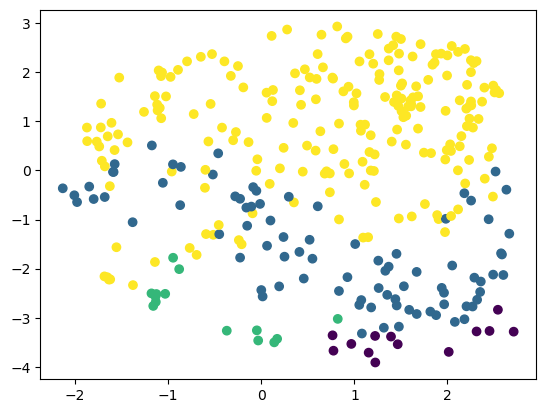

In [19]:
agg_cl_model = AgglomerativeClustering(
    n_clusters= optimal_clusters,
    linkage='complete',
    metric='euclidean',
)
agg_cl_model.fit(temp_df)
data_2d  = TSNE(n_components= 2,\
                learning_rate= 'auto',\
                init= 'random',\
                perplexity= 150).fit_transform(temp_df) # perplexity - определяет, сколько соседей учитываются в расчете условных вероятностей сходства. Большая перплексия приводит к усреднению вероятностей и созданию более глобальной структуры, в то время как маленькая перплексия подчеркивает локальную структуру.
scatter = plt.scatter(data_2d [:, 0], data_2d [:, 1], c= agg_cl_model.fit_predict(temp_df))

plt.show()

## Условие 7
Выполните кластеризацию сферическими кластерами с методом KMeans, также постройте проекцию как на шаге 6, 
определите наиболее типичного представителя (по имени) в каждом из кластеров.


# <b>Kmeans</b>
относится к методам класстеризации на основе прототипирования (partitioning)

<u>Идея:</u>
- При фиксированном числе класстеров найти разбиение выборки X на K не пересекающих класстеров, минимизируя внутриклассовое расстояение inertia 
- В Kmeans внутрикласстерное расстояние - это 

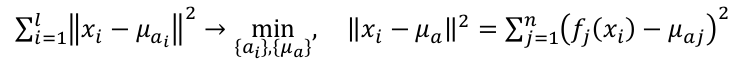

<u>Алгоритм Ллойда</u>
- Вход: количество класстеров K

- 1) Инициализируем центры класстеров
- 2) Цикл пока объекты не перестанут двигаться:
- 2.1 ) Смещаем все объекты к ближнему класстеру
- 2.2 ) Находим новое положение центров  
- Выход: Центры класстеров


________________
Кластер 0: типичный представитель — индекс 267
Имя: Smalley, Roy
Координаты: [ 1.5316455 -2.3586264]
________________
________________
Кластер 1: типичный представитель — индекс 171
Имя: Traber, Jim
Координаты: [1.4711324 1.3163708]
________________
________________
Кластер 2: типичный представитель — индекс 159
Имя: Presley, Jim
Координаты: [-1.0749108  1.0643888]
________________
________________
Кластер 3: типичный представитель — индекс 103
Имя: Whitt, Ernie
Координаты: [-0.21102323 -1.5034018 ]
________________


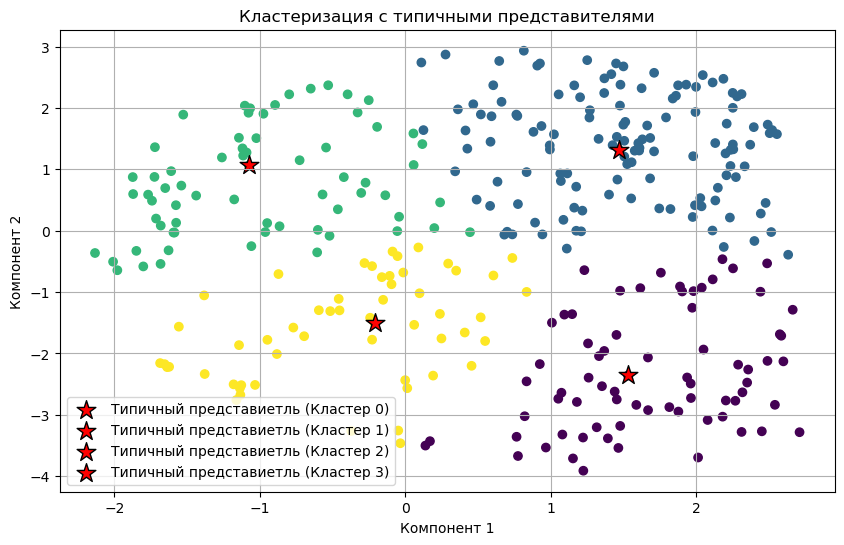

In [20]:
kmean_model = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmean_model.fit_predict(data_2d)

# Создаем график
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels)

# Находим и отмечаем типичных представителей
for cluster_id in range(optimal_clusters):
    """
    Идея: нахожу центроиду и ищу ближайшую точку к ней
    """
    mask = labels == cluster_id # Получаем точки текущего кластера
    cluster_points = data_2d[mask]
    

    centroid = kmean_model.cluster_centers_[cluster_id] # Получаем центроиды
    

    distances = np.linalg.norm(cluster_points - centroid, axis=1)    # Вычисляем расстояния до центроида linalg - вычисляет норму
    
    # Находим индекс ближайшей точки в ОРИГИНАЛЬНОМ наборе данных
    cluster_indices = np.where(mask)[0]  # where возвращает индексы для которых условие верно (? ,)
    typical_idx_in_cluster = np.argmin(distances)  # Индекс в пределах кластера
    typical_idx = cluster_indices[typical_idx_in_cluster]  # Глобальный индекс
    
    # Отмечаем точку на графике
    plt.scatter(
        data_2d[typical_idx, 0], 
        data_2d[typical_idx, 1],
        marker='*', 
        s=200,  # Размер маркера
        color='red',
        edgecolor='black',
        linewidth=1,
        label=f'Типичный представиетль (Кластер {cluster_id})'
    )
    
    # Выводим информацию
    print("________________")
    print(f"Кластер {cluster_id}: типичный представитель — индекс {typical_idx}")
    print(f"Имя: {temp_df.iloc[typical_idx].name}")
    print(f"Координаты: {data_2d[typical_idx]}")
    print("________________")
# Добавляем легенду и оформление
plt.legend()
plt.title('Кластеризация с типичными представителями')
plt.xlabel('Компонент 1')
plt.ylabel('Компонент 2')
plt.grid(True)
plt.show()

## Условие 8
Реализуйте шаги 3-7 в виде функции или класса.

In [21]:
class ClusterAnalyzer:
    def __init__(self, data_df):
        self.data_df = data_df.copy()
        self.temp_df = None
        self.optimal_clusters = None
        self.data_2d = None

    def normalize_and_encode(self):
        """
        Для условия 3
        """
        mask = pd.DataFrame(self.data_df.dtypes == np.object_).iloc[:, 0]
        mask = mask[mask].index
        columns_is_not_object = self.data_df.T[~self.data_df.columns.isin(mask)].T.columns
        scaler = RobustScaler()
        self.data_df[columns_is_not_object] = scaler.fit_transform(self.data_df[columns_is_not_object])
        mask = pd.DataFrame(self.data_df.dtypes == np.object_).iloc[:, 0]
        mask = mask[mask].index
        mask = mask.drop('Position')
        self.data_df = pd.concat([self.data_df.drop(columns=mask), pd.get_dummies(self.data_df[mask])], axis=1)
        self.temp_df = self.data_df.drop(columns=['Position'])

    def plot_dendrogram(self, corx_line= 6):
        """
        Для условия 4
        """
        Z = linkage(self.temp_df, method='complete', metric='euclidean')
        plt.figure(figsize=(12, 50))
        dendrogram(Z, orientation='left', p=20, show_leaf_counts=True, leaf_rotation=0, leaf_font_size=10)
        plt.axvline(x=corx_line, color='red', linestyle='--', linewidth=1)
        plt.title('Дендрограмма (Complete linkage, Euclidean distance)', fontsize=14)
        plt.xlabel('Расстояние между кластерами', fontsize=12)
        plt.ylabel('Номер объекта или кластера', fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

    def sum_dist_to_center(self, X):
        """
        Для условия 5
        """
        center = np.mean(X, axis=0)
        return np.sum((X - center) ** 2)

    def choose_num_clusters(self, max_clust=20):
        """
        Для условия 5
        """
    def choose_num_clusters(self, X= None, XisData_df= True, max_clust=20, linkage_method='complete', metric_method='euclidean'):
        """
        Выбор оптимального числа кластеров на основе критерия pseudo-F.
        Параметры:
            X: данные (n_samples, n_features)
            max_clust: максимальное число кластеров для проверки
        """
        if XisData_df:
            X = self.data_df
        X_array = X.values if hasattr(X, 'values') else X
        N = X_array.shape[0]
        TSS = sum_dist_to_center(X_array)  # Общая сумма квадратов

        pseudo_f = []
        for K in range(2, max_clust + 1):
            # Иерархическая кластеризация
            model = AgglomerativeClustering(
                n_clusters=K,
                linkage=linkage_method,
                metric=metric_method
            )
            labels = model.fit_predict(X_array)

            # Вычисляем внутрикластерную сумму квадратов (WSS или BSS как в коде)
            WSS = 0
            for l in range(K):
                cluster_points = X_array[labels == l]
                WSS += sum_dist_to_center(cluster_points)

            # Between-cluster sum of squares (BSS)
            BSS = TSS - WSS

            # Критерий pseudo-F (Calinski-Harabasz)
            if K == N or WSS == 0:  # Избегаем деления на 0
                fisher_stat = 0
            else:
                fisher_stat = (BSS / (K - 1)) / (WSS / (N - K))
            pseudo_f.append(fisher_stat)

        # Построение графика
        plt.figure(figsize=(10, 6))
        plt.plot(range(2, max_clust + 1), pseudo_f, marker='o', linestyle='-')

        # Находим оптимальное число кластеров (первый локальный максимум)
        optimal_k = 2
        for i in range(1, len(pseudo_f) - 1):
            if pseudo_f[i] > pseudo_f[i - 1] and pseudo_f[i] > pseudo_f[i + 1]:
                optimal_k = i + 2
                break

        # Отмечаем точку на графике
        plt.scatter(
            optimal_k, pseudo_f[optimal_k - 2],
            color='red', marker='D', s=100,
            label=f'Оптимальное k = {optimal_k}'
        )

        plt.xlabel('Число кластеров')
        plt.ylabel('Pseudo-F (Calinski-Harabasz)')
        plt.title(f'Выбор числа кластеров (linkage={linkage_method})')
        plt.grid(True)
        plt.legend()
        plt.show()

        self.optimal_clusters = optimal_k

    def cluster_and_project(self, show= True):
        """
        Для условия 6
        """
        model = AgglomerativeClustering(n_clusters=self.optimal_clusters, linkage='complete', metric='euclidean')
        model.fit(self.temp_df)
        self.data_2d = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=50).fit_transform(self.temp_df)
        if show:
            plt.scatter(self.data_2d[:, 0], self.data_2d[:, 1], c=model.labels_)
            plt.title('Иерархическая кластеризация (TSNE)')
            plt.show()

    def spherical_kmeans_and_typical(self):
        """
        Для условия 7
        """
        kmean_model = KMeans(n_clusters=self.optimal_clusters, random_state=42)
        labels = kmean_model.fit_predict(self.data_2d)
        plt.figure(figsize=(10, 6))
        plt.scatter(self.data_2d[:, 0], self.data_2d[:, 1], c=labels)

        for cluster_id in range(self.optimal_clusters):
            mask = labels == cluster_id
            cluster_points = self.data_2d[mask]
            centroid = kmean_model.cluster_centers_[cluster_id]
            distances = np.linalg.norm(cluster_points - centroid, axis=1)
            cluster_indices = np.where(mask)[0]
            typical_idx = cluster_indices[np.argmin(distances)]
            plt.scatter(self.data_2d[typical_idx, 0], self.data_2d[typical_idx, 1], marker='*', s=200, color='red', edgecolor='black', linewidth=1, label=f'Типичный (Кластер {cluster_id})')
            print("________________")
            print(f"Кластер {cluster_id}: типичный представитель — индекс {typical_idx}")
            print(f"Имя: {self.temp_df.iloc[typical_idx].name}")
            print(f"Координаты: {self.data_2d[typical_idx]}")
            print("________________")

        plt.legend()
        plt.title('Кластеры и типичные представители')
        plt.xlabel('Компонент 1')
        plt.ylabel('Компонент 2')
        plt.grid(True)
        plt.show()

    def get_normalize_df(self):
        return self.temp_df
    
    def set_normalize_df(self, data):
        self.temp_df =  data


## Условие 9
Произведите дополнительную предобработку набора данных, сделав распределения
переменных более симметричными. Для этого с помощью гисторамм или метода describe в
dataframe или метода skew найдите переменные с одной модой и тяжелым правым хвостом,
примените к ним преобразование log(1+x). Запустите функцию из шага 8. Как изменилось
число кластеров, проекции и лучшие представители. Как считаете, субъективное качество
кластеризации изменилось? Как и почему?

,nAtBat,nHits,nHome,nRuns,nRBI,nBB,YrMajor,CrAtBat,CrHits,CrHome,CrRuns,CrRbi,CrBB,nOuts,nAssts,nError,Salary,logSalary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,3.220000e+02,322.000000
mean,-0.001767,0.070215,0.216874,0.110984,0.121463,0.136161,0.240018,0.221103,0.225315,0.428806,0.240501,0.269097,0.321949,0.356866,0.424001,0.255047,1.048161e-16,-0.257187
std,0.596452,0.633398,0.724897,0.659404,0.708366,0.659248,0.709958,0.737502,0.753929,1.132895,0.747196,0.933950,0.928330,1.300842,0.860707,0.796045,8.602798e-01,0.720860
min,-1.094496,-0.967742,-0.708333,-0.947368,-1.027778,-1.015625,-0.714286,-0.601473,-0.596431,-0.503145,-0.550805,-0.664369,-0.578456,-0.982619,-0.248428,-0.750000,-9.887618e-01,-1.827805
25%,-0.492212,-0.437276,-0.375000,-0.421053,-0.444444,-0.421875,-0.285714,-0.365429,-0.373921,-0.301887,-0.354803,-0.418332,-0.347752,-0.476246,-0.204403,-0.375000,-6.536694e-01,-0.763296
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
75%,0.507788,0.562724,0.625000,0.578947,0.555556,0.578125,0.714286,0.634571,0.626079,0.698113,0.645197,0.581668,0.652248,0.523754,0.795597,0.625000,3.463306e-01,0.236704
max,1.231568,2.000000,2.625000,2.157895,2.111111,2.171875,2.571429,3.796975,4.264824,6.389937,4.217657,3.884218,4.707379,5.404403,2.845912,3.250000,4.061370e+00,1.351496


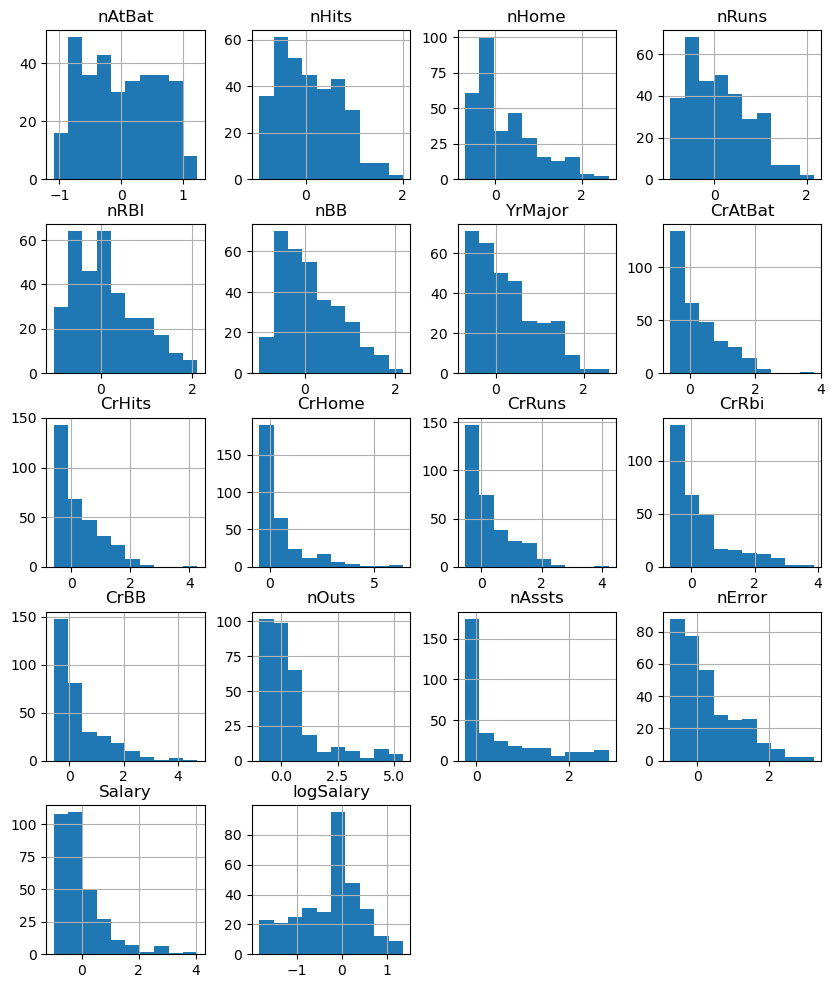

In [22]:
object_analyzer = ClusterAnalyzer(data_df2)
object_analyzer.normalize_and_encode()
normalizer_df = object_analyzer.get_normalize_df().copy()
normalizer_df.hist(figsize= (10, 12))
normalizer_df.describe()

Из диаграммы видно, что столбцы 'CrAtBat', 'CrHits', 'CrHome', 'CrRuns', 'CrRBI', 'CrBB', 'nOuts', 'nAssts', 'Salary' имеют тяжелый хвост и один пик (одно модова) 

array([[<Axes: title={'center': 'CrAtBat'}>,
        <Axes: title={'center': 'CrHits'}>,
        <Axes: title={'center': 'CrHome'}>],
       [<Axes: title={'center': 'CrRuns'}>,
        <Axes: title={'center': 'CrRbi'}>,
        <Axes: title={'center': 'CrBB'}>],
       [<Axes: title={'center': 'nOuts'}>,
        <Axes: title={'center': 'nAssts'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

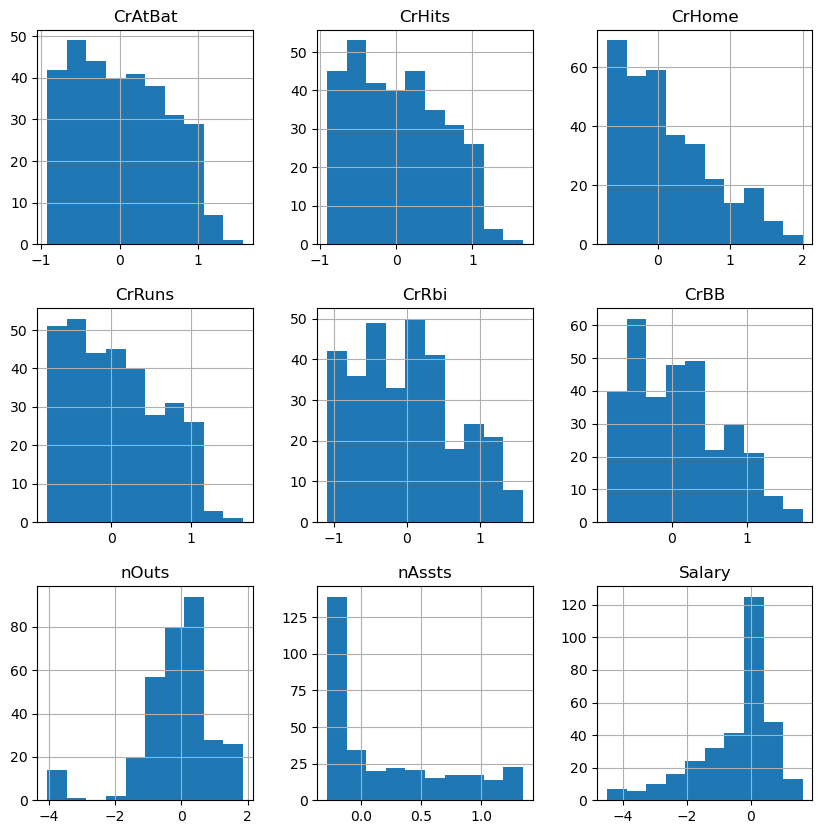

In [23]:
temp_columns = ['CrAtBat', 'CrHits', 'CrHome', 'CrRuns', 'CrRbi', 'CrBB', 'nOuts', 'nAssts', 'Salary']
normalizer_df = np.log1p(normalizer_df[temp_columns])
normalizer_df.hist(figsize=(10, 10))


In [24]:
normalizer_df = pd.concat([normalizer_df, object_analyzer.get_normalize_df().drop(columns= temp_columns)], axis= 1)

## Вывод
Почему пришлось логарфмировать данные? 

Т.к. благодаря этому влияние наших выбросов уменьшилось, это достигается благодаря тому, что логарифми отображает большие значения в более маленькие и (1 + x) нужна, т.к. логарифм в 0 не определен.

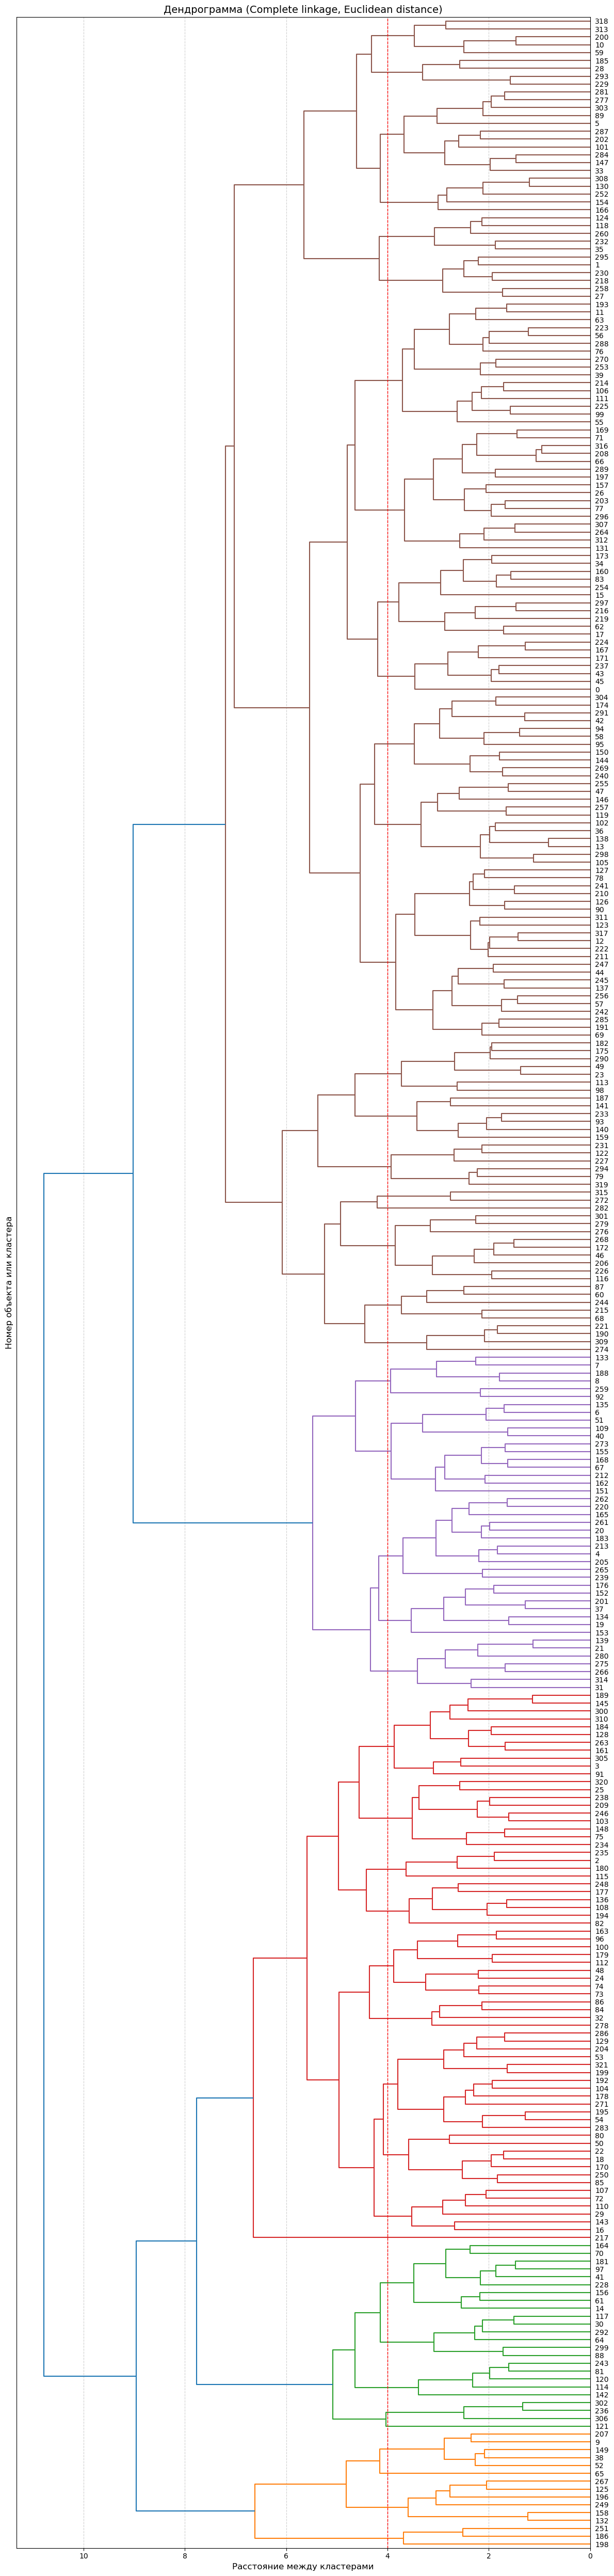

In [25]:
object_analyzer = ClusterAnalyzer(normalizer_df)
object_analyzer.set_normalize_df(data= normalizer_df)
object_analyzer.plot_dendrogram(corx_line= 4)

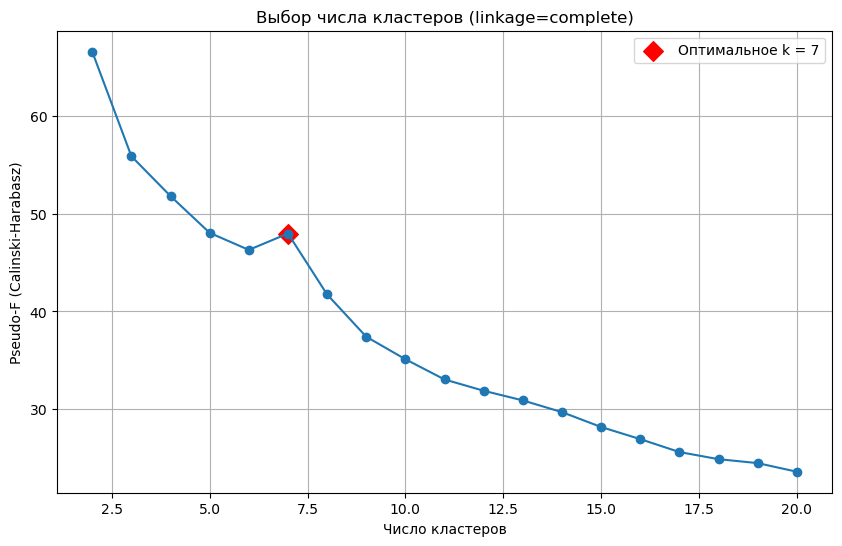

In [26]:
object_analyzer.choose_num_clusters()

________________
Кластер 0: типичный представитель — индекс 91
Имя: Strawberry, Darryl
Координаты: [-4.7181015 -8.56008  ]
________________
________________
Кластер 1: типичный представитель — индекс 297
Имя: Laudner, Tim
Координаты: [3.7094033 2.626542 ]
________________
________________
Кластер 2: типичный представитель — индекс 31
Имя: Hatcher, Billy
Координаты: [1.4831038 9.689897 ]
________________
________________
Кластер 3: типичный представитель — индекс 14
Имя: Almon, Bill
Координаты: [-4.433688   6.2739406]
________________
________________
Кластер 4: типичный представитель — индекс 132
Имя: McRae, Hal
Координаты: [11.573654 -5.252184]
________________
________________
Кластер 5: типичный представитель — индекс 178
Имя: Griffey, Ken
Координаты: [ 2.1266303 -7.276309 ]
________________
________________
Кластер 6: типичный представитель — индекс 1
Имя: Ashby, Alan
Координаты: [-6.64014   -0.6791223]
________________


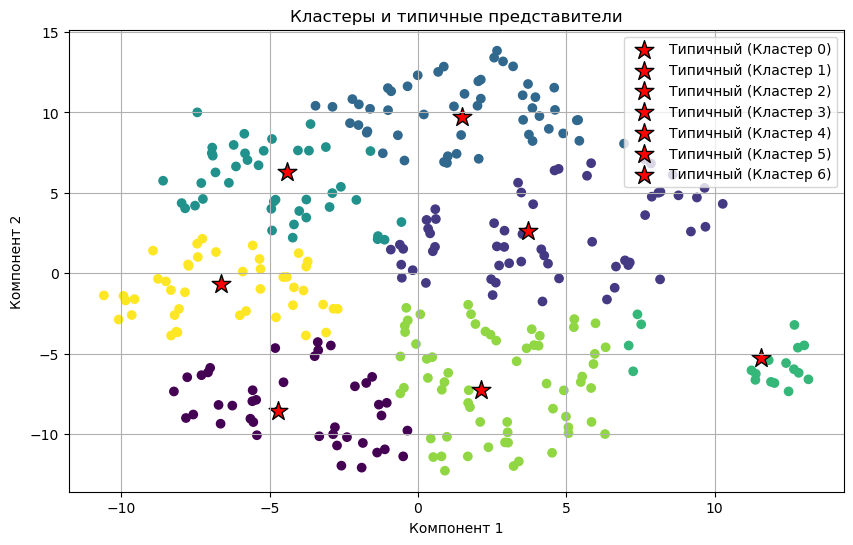

In [27]:
object_analyzer.cluster_and_project(show= False)
object_analyzer.spherical_kmeans_and_typical()

## Вывод
После нормализации некоторых фичей с помощью Log(1 + x) 
- Число класстеров увеличелось
- Отображение(Проекция) с помошью T-SNE будет всегда разным, т.к. он зависит от начальной инициализации (оно случайное)

<u> Субъективное качество класстеризации :</u>

Но есть улучшения, например <i><b>стало меньше граничных точек</b></i> -> Класстеры легче отличить.

Это произошло из-за того, что наше <i><b>распределение стало более симметричным и влияние выбросов стало меньше благодаря логарифмированию</i></b> 

## Условие 10

Отберите 7 наиболее значимых переменных с помощью метода
VarClus. Запустите функцию из шага 8. Как изменилось число кластеров, проекции и лучшие
представители. Как считаете, субъективное качество кластеризации изменилось? Как и
почему?

# <b>VarClus</b>

<u>Идея:</u> Сгруппировать признаки так, чтобы внутри группы объекты были макисмально коррелированы между собой

<u>Алгоритм:</u>
- Есть исходное пространство, в котором находятся все признаки
- Далее делим объекты на группы (Делится та группа у которой Eigen Value бальше, чем у остальных) таким образом, чтобы объекты внутри группы были коррелированы с главной компонентой
- И этот процесс продолжается рекурсивно 
- Процесс прекращается, когда Eigen Value маленькое (говорит о том, что корреляция вдоль этой оси маленькая) 

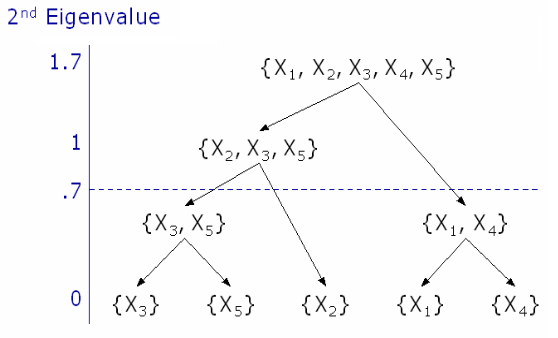


<u>Как выбрать наилучшего представителя? </u>

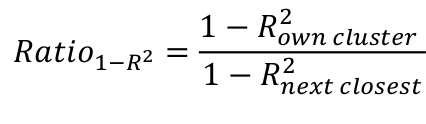

- R^(2)own - объекты из своего класстера, как сильно похожи на выбранного представителя
- R^(2)next - объекты из других класстеров, как сильно похожи на нашего представителя
Нужно, чтобы 

In [28]:
columns_with_bool_type = normalizer_df.select_dtypes(include= ['bool']).columns
normalizer_df[columns_with_bool_type] = normalizer_df[columns_with_bool_type].astype(float)

In [29]:
clusters = VarClusHi(normalizer_df, maxclus= 7)
clusters.varclus()

In [30]:
clusters.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,9,7.477793,0.989837,0.830866
1,1,8,4.704477,1.040626,0.588060
2,2,10,3.039259,1.158166,0.303926
3,3,5,1.677812,1.042978,0.335562
4,4,9,3.043904,1.045455,0.338212
5,5,3,1.737488,0.998814,0.579163
6,6,6,1.647657,1.042071,0.274609


In [31]:
df = clusters.rsquare
df

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,CrAtBat,0.960719,0.087482,0.043047
1,0,CrHits,0.958499,0.099886,0.046106
2,0,CrHome,0.778662,0.159255,0.263264
3,0,CrRuns,0.957383,0.120267,0.048443
4,0,CrRbi,0.960521,0.133430,0.045557
5,0,CrBB,0.902022,0.088545,0.107496
6,0,Salary,0.572255,0.155855,0.506720
7,0,YrMajor,0.796903,0.028892,0.209140
8,0,logSalary,0.590829,0.174804,0.495848
9,1,nAtBat,0.882786,0.130349,0.134782


In [32]:
temp = df.groupby(by= 'Cluster')['RS_Ratio'].min()
df = df[df['RS_Ratio'].isin(temp)]
df

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,CrAtBat,0.960719,0.087482,0.043047
12,1,nRuns,0.893947,0.068916,0.113903
24,2,Division_East,0.859638,0.338051,0.212044
25,2,Division_West,0.859638,0.338051,0.212044
31,3,Div_NE,0.904862,0.102320,0.105982
38,4,League_American,0.827981,0.310238,0.249389
39,4,League_National,0.827981,0.310238,0.249389
41,5,nAssts,0.864606,0.032040,0.139875
48,6,Div_AW,0.915824,0.317311,0.123300


## Вывод
Из вывода df видно, что у некоторых классов можно выбрать несколько фичей, т.к. RS_Ratio  у них одинаковы и минимальны

In [33]:
select_columns  = df['Variable']
normalizer_df = normalizer_df[[column for column in select_columns if column != 'League_National' and column != 'Division_West']]
normalizer_df

,CrAtBat,nRuns,Division_East,Div_NE,League_American,nAssts,Div_AW
Name,,,,,,,
"Allanson, Andy",-0.823821,-0.473684,1.0,0.0,1.0,-0.041740,0.0
"Ashby, Alan",0.363501,-0.631579,0.0,0.0,0.0,0.021774,0.0
"Davis, Alan",-0.150449,0.473684,0.0,0.0,1.0,0.236885,1.0
"Dawson, Andre",0.755424,0.447368,1.0,1.0,0.0,-0.197531,0.0
"Galarraga, Andres",-0.752100,-0.236842,1.0,1.0,0.0,0.003140,0.0
...,...,...,...,...,...,...,...
"McGee, Willie",0.184049,0.447368,1.0,1.0,0.0,-0.212975,0.0
"Randolph, Willie",0.737861,0.736842,1.0,0.0,1.0,1.146703,0.0
"Tolleson, Wayne",-0.122854,0.342105,0.0,0.0,1.0,0.379986,1.0


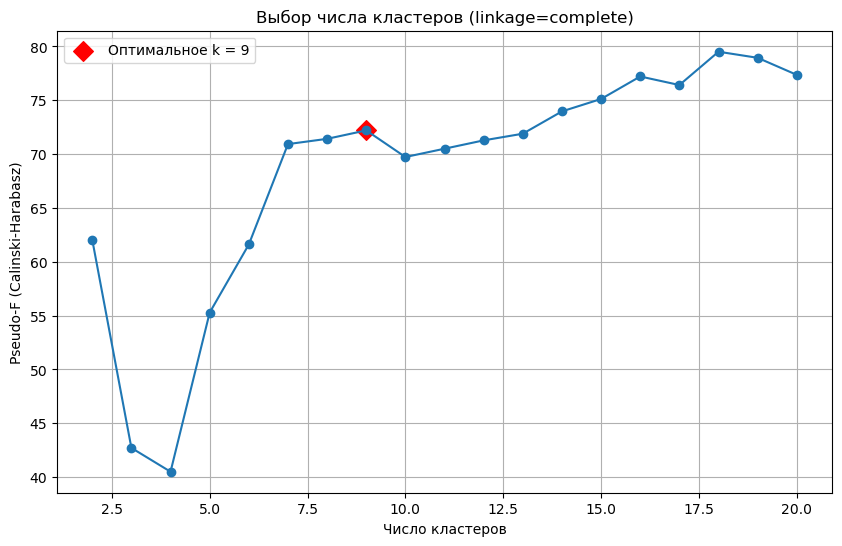

________________
Кластер 0: типичный представитель — индекс 189
Имя: Durham, Leon
Координаты: [-2.331814 10.662289]
________________
________________
Кластер 1: типичный представитель — индекс 286
Имя: Brunansky, Tom
Координаты: [-7.9051238e-03 -1.3131618e+01]
________________
________________
Кластер 2: типичный представитель — индекс 167
Имя: Shelby, John
Координаты: [-9.195255    0.70008785]
________________
________________
Кластер 3: типичный представитель — индекс 218
Имя: Scioscia, Mike
Координаты: [7.5075893 1.970063 ]
________________
________________
Кластер 4: типичный представитель — индекс 147
Имя: Franco, Julio
Координаты: [-7.466344 -3.720076]
________________
________________
Кластер 5: типичный представитель — индекс 165
Имя: Russell, John
Координаты: [-2.013004 14.195984]
________________
________________
Кластер 6: типичный представитель — индекс 177
Имя: Gibson, Kirk
Координаты: [-4.9878283 -1.8096958]
________________
________________
Кластер 7: типичный представит

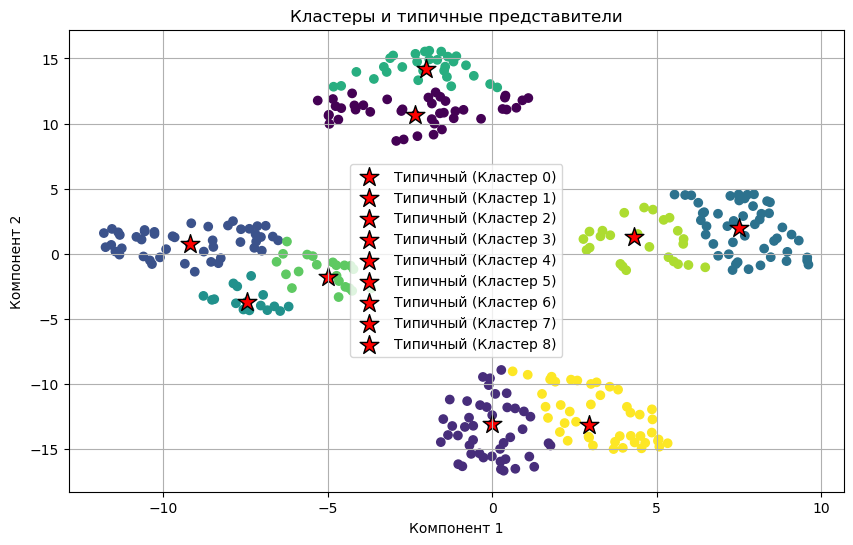

In [34]:
clus = ClusterAnalyzer(normalizer_df)
clus.set_normalize_df(data= normalizer_df)
clus.choose_num_clusters()
clus.cluster_and_project(show= False)
clus.spherical_kmeans_and_typical()

## Вывод
- Число класстеров увеличилось
- В TSNE проекция зависит от инициализации, поэтому проекция всегда будет разной
- Лучшие представители тоже изменились 

<u>Субъективное качество класстеризации: </u>

- Уменьшилось, т.к. находятся большое количество класстеров, явно больше, чем на самом деле, т.к. есть класстеры которые можно объединить, во время проекции с помощью TSNE можно заметить, что класстеры явно не очерчены

- Произошло это, потому что мы удалили весомую информацию из нашего датасета с помощью VarClus

# Условие 11
«Творческое задание» на поиск аномалий. 

- Загрузите файл mnist_small.csv.  Данный набор данных содержит подмножество эталонного набора данных рукописных цифр MNIST. 5923 картинок 28x28 пикселей с изображением нуля и 76 картинок с изображением шестерки.

- Задача состоит в том, чтобы с использованием методов обучения без учителя (алгоритм LOF) построить одноклассовую модель на основе поиска аномалий, которая максимально хорошо отфильтрует шестерки (как аномалии) от нулей (как основной выборки).
Признаки картинок описываются их координатами (в названии переменных, например «10x12») и
значением яркости точки по этим координатам.

- Подбирая параметры метода и преобразуя признаки как посчитаете нужным, но не используя при этом информацию о label, постройте
модель выявления аномалий с ERR меньше 0.2. 

# <b>LOF</b>
- Определяет аномалии в методах ближайших соседей
- Анализирует структуру ближайших соседей 
- Для каждого объекта анализирует аномальность и дает оценку не только с точки зрения разреженности, но и его ближайших соседей

<u>Алгоритм:</u>
1) Считает растояние до k-го соседа (Dk) для каждой точки
2) Считается достижимое растояние для каждого x по образцу y: 

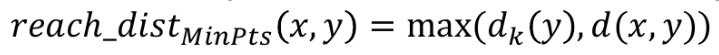

- это максимум среди растояния до k-го соседа и до данного наблюдения
- т.е. все наблюдения, которые лежат на расстоянии меньше, чем до k-го соседа имеют одинаковые расстояния:

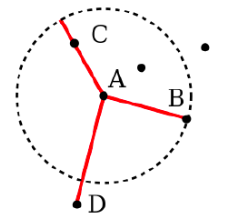 - 

- Растояния точек A, B, C - будут одинаковыми
- Растояние точки D уже больше!

3) Считается локальная достижимая плотность local reachability density (lrd) для как среднее достижимое расстояние по MinPts соседям

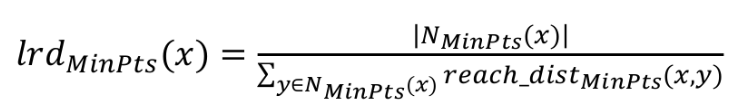

- число соседей вокруг наблюдения X, деленая на сумму достижимого расстояния соседей
- т.к. считаем насколько компактна область соседей по всемм соседям, а не только по одному наблюдению

4) Дальше считаем LOF - локальный уровень аномальности: 

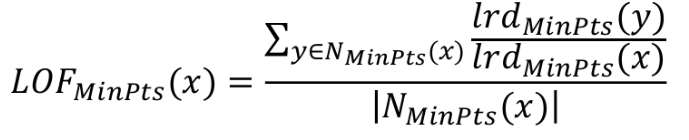

- для каждого наблюдения X берем соседей и считаем насколько их плотность отличается от плотноти данного наблюдения
- и не забываем усреднить по числу соседей

!!! Чем LOF больше, тем он более аномальней !!!
- Если он меньше 1, то область вокруг него густо заселена
- Если он больше 1, то область вокруг него сильно разрежена

In [32]:
df = pd.read_csv("mnist_small.csv")

In [33]:
labels = df['label']
train_data = df[labels == 0]
train_data = df.drop(columns=['label'])


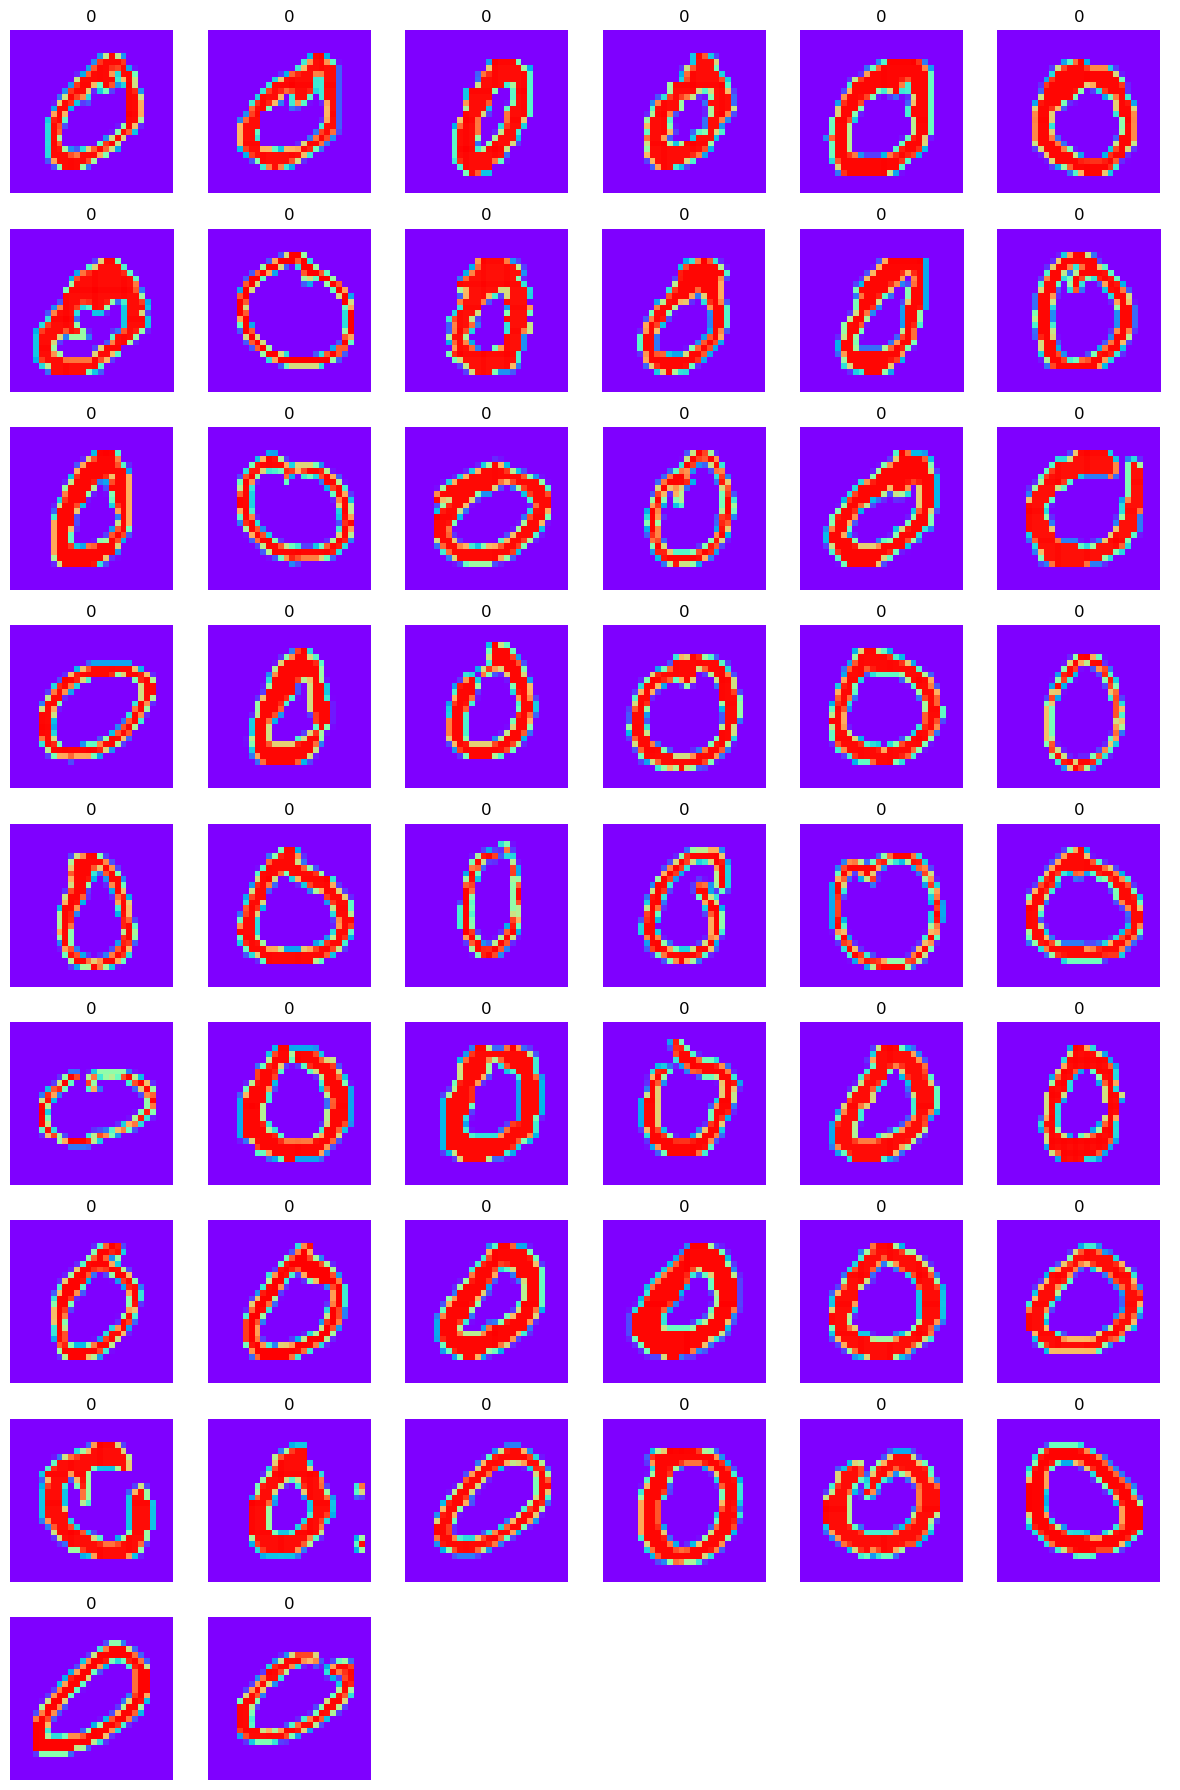

In [34]:
def show_images(t_data= df, num_col=6, start=0, end=5998, step=1, cmap= 'rainbow'):
    """
    6-ки начинаеются с 5923
    """
    total = (end - start) // step
    train_data = t_data.drop(columns=['label'])
    
    if total < 1:
        print("Нет объектов в заданном диапазоне")
        return
    
    num_col = min(num_col, total)
    num_row = (total + num_col - 1) // num_col  # Округление вверх

    fig, ax = plt.subplots(nrows=num_row, ncols=num_col, figsize=(num_col*2, num_row*2))
    ax = np.atleast_2d(ax)

    temp_image_idx = start
    for i in range(num_row):
        for j in range(num_col):
            idx = temp_image_idx
            if idx > end or (idx - start) // step >= total:
                ax[i, j].axis('off')
            else:
                pixel_array = np.array(train_data.iloc[idx]).reshape(28, 28)
                ax[i, j].imshow(pixel_array, cmap= cmap)
                ax[i, j].set_title(t_data.iloc[temp_image_idx]['label'])
                ax[i, j].axis('off')
                temp_image_idx += step

    plt.tight_layout()
    plt.show()
show_images(end= 50)

## Посмотрим на исходные данные
Визуализируем с помощью TSNE:

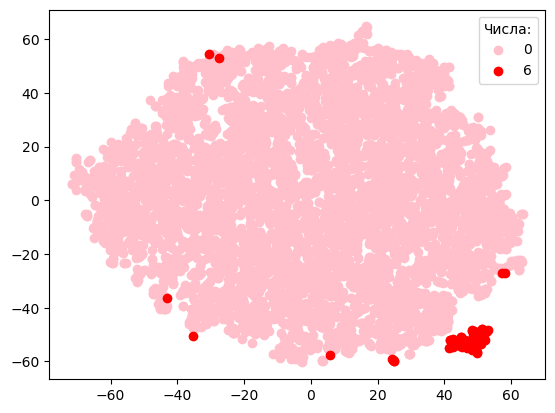

In [35]:
tsne = TSNE(n_components= 2)
x_tsne = tsne.fit_transform(df.drop(columns= 'label'))
plt.scatter(x_tsne[:, 0][labels == 0], x_tsne[:, 1][labels == 0], c='pink', label= '0')
plt.scatter(x_tsne[:, 0][labels == 6], x_tsne[:, 1][labels == 6], c='red', label= '6')
plt.legend(title= 'Числа:')
plt.show()

## Воспользуемся LOF

ИСТОЧНИК: https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection

ERR= {False Positives+False Negatives} / Total Samples
​
 


In [36]:
lof = LocalOutlierFactor(
    n_neighbors= 100,
    contamination= 76/(5923+76),# доля аномалий
    novelty=True,
    metric= 'euclidean', #'minkowski', #'cosine'#'manhattan' #'euclidean'
    p= 6
)
lof.fit(train_data)
y_pred = -lof.score_samples(train_data)
y_pred

/home/ranil/anaconda3/envs/math/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


array([0.98371227, 1.06393357, 1.02991626, ..., 1.13072995, 1.23250561,
       1.10572055])

EER: 0.07428667904777984


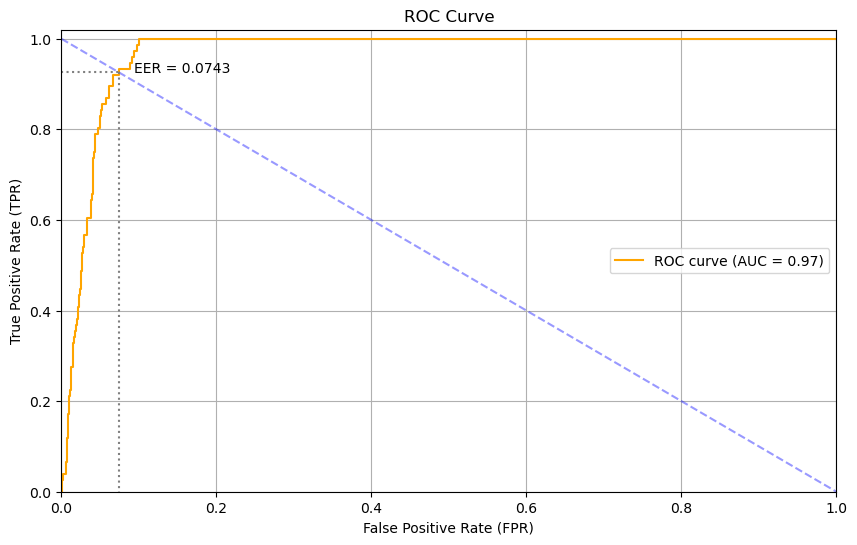

In [37]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(labels, # истинные метки 
                                 y_pred, # предсказание нашей модели
                                 pos_label= 6) # относительно какой цифры считать roc кривую
# fpr - наша модель не правильно предсказывает 6
# tpr - правильно предсказывает 6
fnr = 1 - tpr # fnr - модель не правильно предсказывает 0

eer_threshold = thresholds[np.nanargmin(np.absolute(fnr - fpr))] # nanargmin - игнорирует NaN значения  absolute 0 находит минимальную разность между fnr и fpr
EER = fpr[np.nanargmin(np.absolute(fnr - fpr))]

print("EER:", EER)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange',
         label=f'ROC curve (AUC = {roc_auc:.2f})')


# plt.plot([0, 1], [0, 1], color='g')

plt.plot([0, 1], [1, 0], color='b', linestyle='--', alpha=0.4)

# show EER
plt.plot([EER, EER], [1 - EER, 0], color='gray', linestyle='dotted')
plt.plot([0, EER], [1 - EER, 1 - EER], color='gray', linestyle='dotted')

plt.text(EER + 0.02, 1 - EER, f'EER = {EER:.4f}')

# plot style
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)


## Условие 12

Постройте ROC кривую с ERR. Выведите 4 картинки с числами (28 на 28 пикселей):
- самый типичный “0” – true negative с минимальной аномальностью
- самая аномальная “6” – true positive с максимальной аномальностью
- самый нетипичный “0” – false positive с максимальной аномальностью
- самая неаномальная “6” – false negative с минимальной аномальностью

In [21]:
print(len(y_pred[labels == 0]), len(range(5923)))

5923 5923


самый аномальный из 6


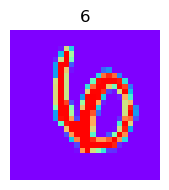

самый аномальный из 0


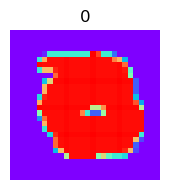

самый не аномальный из 6


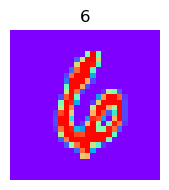

самый не аномальный из 0


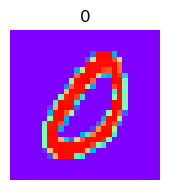

In [38]:
# среди 0-ей
v0_idx = pd.DataFrame(data= {'value' : y_pred[labels == 0]})
v6_idx = pd.DataFrame(data= {'value' : y_pred[labels == 6]})

idx_more_anom6 = v6_idx[v6_idx['value'] == v6_idx['value'].max()].index[0] + 5923 #самый аномальный из 6
idx_more_anom0 = v0_idx[v0_idx['value'] == v0_idx['value'].max()].index[0] #самый аномальный из 0

idx_less_anom6 = v6_idx[v6_idx['value'] == v6_idx['value'].min()].index[0] + 5923 #самый не аномальный из 6
idx_less_anom0 = v0_idx[v0_idx['value'] == v0_idx['value'].min()].index[0] #самый не аномальный из 0

print("самый аномальный из 6")
show_images(start= idx_more_anom6, end= idx_more_anom6 + 1)
print("самый аномальный из 0")
show_images(start= idx_more_anom0, end= idx_more_anom0 + 1)

print("самый не аномальный из 6")
show_images(start= idx_less_anom6, end= idx_less_anom6 + 1)
print("самый не аномальный из 0")
show_images(start= idx_less_anom0, end= idx_less_anom0 + 1)